## CMSC 35300 Final Project: Least Squares Models
Shweta Kamath <br>
Nivedita Vatsa <br>
Carolyn Vilter

#### Setup

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [377]:
# Import combined, cleaned, standardized data
df = pd.read_csv("data/all_data_standardized.csv")

In [378]:
df

,child_id,mother_id,treat_alike_scale,treat_alike_binary,year_at_y,gap_at_y,self_worth,yob_child,father_present,religion_freq,...,highest_expected_grade_GET MORE THAN 4 YEARS OF COLLEGE,highest_expected_grade_SOMETHING ELSE,mother_race_BLACK,"mother_race_NON-BLACK, NON-HISPANIC",mother_relig_raised_protestant,mother_relig_raised_catholic,mother_relig_raised_other,mother_relig_current_protestant,mother_relig_current_catholic,mother_relig_current_other
0,301,3,2,1,0.0,0.5,0.555556,0.045455,1.000000,0.2,...,0,0,0,1,0,1,0,0,1,0
1,302,3,1,1,0.1,0.5,1.000000,0.136364,1.000000,0.5,...,0,0,0,1,0,1,0,0,1,0
2,303,3,1,1,0.3,1.0,0.888889,0.272727,1.000000,0.8,...,0,0,0,1,0,1,0,0,0,1
3,803,8,1,1,0.1,1.0,0.611111,0.090909,0.363636,0.2,...,0,0,0,1,0,0,1,1,0,0
4,1601,16,1,1,0.5,1.0,0.666667,0.454545,1.000000,0.6,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,1255801,12558,2,1,0.4,0.5,1.000000,0.409091,0.000000,1.0,...,0,0,1,0,0,0,1,0,0,1
5157,1256602,12566,2,1,0.2,0.5,0.888889,0.227273,1.000000,1.0,...,0,0,1,0,1,0,0,1,0,0
5158,1256603,12566,1,1,0.4,1.0,0.888889,0.363636,0.888889,1.0,...,1,0,1,0,1,0,0,1,0,0
5159,1256604,12566,1,1,0.5,0.0,0.944444,0.545455,0.714286,1.0,...,1,0,1,0,1,0,0,1,0,0


In [379]:
# Separate out Xs
X = df.loc[:, ~df.columns.isin(["child_id", "mother_id", "treat_alike_scale", "treat_alike_binary"])]
X = X.to_numpy()

# Separate out two prospective ys
y_scale = df.loc[:, df.columns == "treat_alike_scale"]
y_scale = y_scale.to_numpy()

y_binary = df.loc[:, df.columns == "treat_alike_binary"]
y_binary = y_binary.to_numpy()

### Least Squares
Predict repeatedly using cross validation; plot test error.

In [380]:
# Number of random trials
N = 100
# Store error values
errs = np.zeros(N)
# Number of observations/samples
n = X.shape[0]
# Chosen number of sets to divide dataset into
n_sets = 10
# Final index of the training set (9 of 10 subsets)
t_index = n//n_sets*(n_sets-1)
# Dict to count frequencies of each label in yhats
yhat_labels = {1: 0, 2: 0, 3: 0, 4: 0}

for i in range(N):

    # (Re)assign training and hold-out indices
    r = np.random.permutation(n)
    it = r[:t_index]
    ih = r[t_index:]

    # Training data
    Xt = X[it, :]

    # Find w-hat using using training y_scale
    yt = y_scale[it]
    wt = np.linalg.inv(Xt.T@Xt)@Xt.T@yt

    # Apply w-hat to holdout data
    Xh = X[ih, :]
    yh = y_scale[ih]
    yhat = Xh@wt

    # Assign y-hat results to closest label: 1, 2, 3, or 4
    for idx, pred in enumerate(yhat):
        dists = []
        for label in range(1, 5):
            dists.append(abs(pred - label))
        match = dists.index(min(dists))
        yhat[idx] = match + 1

    errs[i] = np.mean(yhat != yh)

    # Count prediction frequency for each label 
    for prediction in yhat:
        yhat_labels[prediction[0]] += 1

In [381]:
labels = []
counts = []
for label, count in yhat_labels.items():
    labels.append(label)
    counts.append(count)
print(labels)
print(counts)

[1, 2, 3, 4]
[28185, 1685, 3310, 18520]


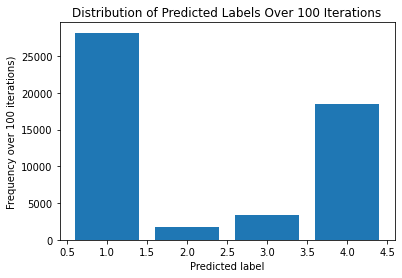

In [382]:
# Plot label prediction counts
plt.bar(labels, counts)
plt.xlabel('Predicted label')
plt.ylabel('Frequency over {:.0f} iterations)'.format(N))
plt.title('Distribution of Predicted Labels Over {:.0f} Iterations'.format(N))
plt.show()

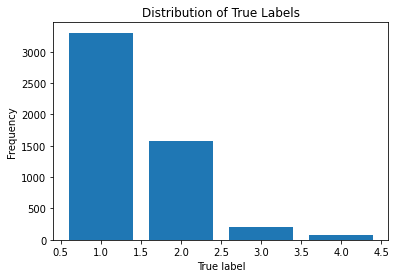

In [383]:
# Converting into bar-chart data setup for graphic consistency
labels_actual = [1, 2, 3, 4]
counts_actual = [0, 0, 0, 0]
for label in y_scale:
    idx = label[0]-1
    counts_actual[idx] += 1

plt.bar(labels_actual, counts_actual)
plt.xlabel('True label')
plt.ylabel('Frequency')
plt.title('Distribution of True Labels')
plt.show()

Average error rate over all iterations: 0.632514506769826


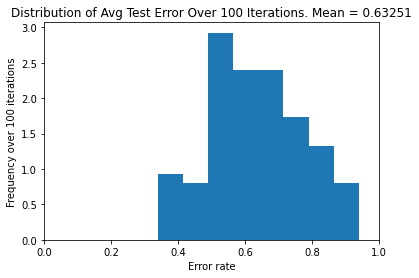

In [384]:
avg_error = np.mean(errs)
print("Average error rate over all iterations:", avg_error)

# Plot histogram of error rates
plt.hist(errs, density=True, bins=8)
plt.xlim(0, 1)
plt.xlabel('Error rate')
plt.ylabel('Frequency over {:.0f} iterations'.format(N))
plt.title('Distribution of Avg Test Error Over {:.0f} Iterations. Mean = {:.5f}'.format(N, avg_error))
plt.show()

In [385]:
wt

array([[ 4.07025669e+16],
       [-2.66411327e+16],
       [ 1.96451528e+16],
       [ 5.00280135e+16],
       [ 1.26475716e+16],
       [ 2.33472822e+15],
       [-2.48678861e+17],
       [ 1.76603915e+16],
       [ 2.33980815e+15],
       [ 2.18197349e+15],
       [-5.33283122e+15],
       [ 3.73832667e+14],
       [ 6.94802524e+14],
       [ 2.21736144e+15],
       [ 7.91620506e+15],
       [ 1.95918083e+15],
       [ 2.13802667e+15],
       [ 7.68398055e+15],
       [-8.29742326e+15],
       [ 4.78898303e+15],
       [-1.85747046e+15],
       [ 4.40571642e+15],
       [ 3.14081048e+15],
       [-7.88181170e+15],
       [ 8.88938579e+15],
       [-6.33948458e+15],
       [-3.66369215e+15],
       [-2.09141512e+17],
       [ 1.68832514e+17],
       [-4.88081248e+00],
       [-5.15187591e+01],
       [-5.48190620e+01],
       [-2.79062077e+01],
       [-2.70400603e+01],
       [-3.77320803e+01],
       [ 2.26505689e+17],
       [-1.68832514e+17],
       [ 2.04917143e+00],
       [ 4.1